# Realized Volatility Models in the OpenBB SDK

The same, six, realized volatility models from the, *Getting Started With Python for Quant Finance*, course have been integrated with the OpenBB SDK, as of version 2.5. Each model is callable through its own function, as well an additional function for realized volatility quantiles of any asset with OHLC data. If you aren't already familiar with his work, Jason's newsletter provides usable, relavant, and practical code to your inbox every week. If you are new, to finance or to Python, the community Jason has built is a valuable resource for any type of user and his style of communication is highly effective. Check out the course [here](​https://gettingstartedwithpythonforquantfinance.com/?ref=ezyapsobd​). This notebook is a sample of what the course has to offer, applied through building in public.

To begin, import the OpenBB SDK as well as the Pandas library.

In [1]:
# Import statements

import pandas as pd
from openbb_terminal.sdk import openbb

%matplotlib inline

## End Points

The cones function is for the rolling quantiles, while the other functions return historical calculations over a specific window. The `cones` function applies a `for` loop over many windows, grouping the results into selectable quantiles.

`windows = [3, 10, 30, 60, 90, 120, 150, 180, 210, 240, 300, 360]`

`openbb.ta.cones()`

`openbb.ta.rvol_garman_klass()`

`openbb.ta.rvol_hodges_tompkins()`

`openbb.ta.rvol_parkinson()`

`openbb.ta_rvol_rogers_satchell()`

`openbb.ta.rvol_std()`

`openbb.ta.rvol_yang_zhang()`

## Collect Some Data

One of the primary steps for most workflows is to capture historical price data. The most robust method is to use the `load` function from the `stocks` module. 

In [2]:
# This will obtain daily price data for the complete history of SPY. The start date only needs to be before the first trading day of SPY, no end date is required to obtain the full history.

df = openbb.stocks.load("SPY", start_date = '1990-01-01')

Loading Daily data for SPY with starting period 1993-01-29.

## Function Inputs and Parameters

The primary input for each function is a Pandas DataFrame containing OHLC data. All other parameters have default settings which do not require additional user input. The `is_crypto` boolean provides an easy switch for the number of trading-days-per-year. 252 is the standard for equities and trad-fi, while `is_crypto = True` enforces 365.


In [3]:
openbb.ta.cones?

Signature:     
openbb.ta.cones(
    data: pandas.core.frame.DataFrame,
    lower_q: float = 0.25,
    upper_q: float = 0.75,
    is_crypto: bool = False,
    model: str = 'STD',
) -> pandas.core.frame.DataFrame
Call signature: openbb.ta.cones(*args: Any, **kwargs: Any) -> Any
Type:           cones
String form:    <openbb_terminal.common.technical_analysis.volatility_model.Operation object at 0x2ac319e40>
File:           ~/GitHub/OpenBBTerminal/openbb_terminal/common/technical_analysis/volatility_model.py
Docstring:     
Returns a DataFrame of realized volatility quantiles.

Parameters
---------
data: pd.DataFrame
    DataFrame of the OHLC data.
lower_q: float (default = 0.25)
    The lower quantile to calculate the realized volatility over time for.
upper_q: float (default = 0.75)
    The upper quantile to calculate the realized volatility over time for.
is_crypto: bool (default = False)
    If true, volatility is calculated for 365 days instead of 252.
model: str (default = "STD")
  

In [4]:
openbb.ta.rvol_parkinson?

Signature:     
openbb.ta.rvol_parkinson(
    data: pandas.core.frame.DataFrame,
    window: int = 30,
    trading_periods: Optional[int] = None,
    is_crypto: bool = False,
    clean=True,
) -> pandas.core.frame.DataFrame
Call signature: openbb.ta.rvol_parkinson(*args: Any, **kwargs: Any) -> Any
Type:           parkinson
String form:    <openbb_terminal.common.technical_analysis.volatility_model.Operation object at 0x2ac31a470>
File:           ~/GitHub/OpenBBTerminal/openbb_terminal/common/technical_analysis/volatility_model.py
Docstring:     
Parkinson volatility uses the high and low price of the day rather than just close to close prices.
It is useful for capturing large price movements during the day.

Parameters
----------
data : pd.DataFrame
    Dataframe of OHLC prices.
window : int [default: 30]
    Length of window to calculate over.
trading_periods : Optional[int] [default: 252]
    Number of trading periods in a year.
is_crypto : bool [default: False]
    If true, trading_

## Sample Outputs

Let's take a look at what the expected outputs are. The data we have loaded already is the complete daily OHLC history of SPY. 

In [5]:
df.head(1)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
1993-01-29,25.236156,25.236156,25.110603,25.21822,25.21822,1003200,0.0,0.0


### Standard Deviation Model

This model requires a minimum window of two trading periods, the default is thirty. The calculations, by default, are annualized over 252 trading-days-per-year. To change this behaviour:

- `is_crypto = True` to annualize over 365 days.
- Enter an integer value for the `trading_periods` argument. 

In [6]:
openbb.ta.rvol_std(df, window = 1)

Error: Window must be at least 2, defaulting to 30.


date
1993-03-15    0.133722
1993-03-16    0.132503
1993-03-17    0.133976
1993-03-18    0.131751
1993-03-19    0.131355
                ...   
2023-02-23    0.163743
2023-02-24    0.163181
2023-02-27    0.163138
2023-02-28    0.163079
2023-03-01    0.163359
Name: Close, Length: 7546, dtype: float64

For each model there is an override for the `is_crypto` boolean that allows any period to be entered. A message will print indicating that 365 has been overridden. 

In [7]:
openbb.ta.rvol_std(df, trading_periods = 2, window = 365, is_crypto = True)

is_crypto is overridden by trading_periods.


date
1994-07-12    0.008657
1994-07-13    0.008643
1994-07-14    0.008677
1994-07-15    0.008643
1994-07-18    0.008638
                ...   
2023-02-23    0.019422
2023-02-24    0.019436
2023-02-27    0.019434
2023-02-28    0.019426
2023-03-01    0.019427
Name: Close, Length: 7211, dtype: float64

In [8]:
openbb.ta.rvol_std(df, window = 2)

date
1993-02-02    0.055806
1993-02-03    0.094284
1993-02-04    0.071162
1993-02-05    0.054680
1993-02-08    0.007806
                ...   
2023-02-23    0.075032
2023-02-24    0.180106
2023-02-27    0.158720
2023-02-28    0.079730
2023-03-01    0.001577
Name: Close, Length: 7574, dtype: float64

Notice the difference  in the output when the `is_crypto` argument is deployed.

In [9]:
openbb.ta.rvol_std(df, is_crypto = True, window = 2)

date
1993-02-02    0.067162
1993-02-03    0.113471
1993-02-04    0.085644
1993-02-05    0.065808
1993-02-08    0.009395
                ...   
2023-02-23    0.090301
2023-02-24    0.216758
2023-02-27    0.191019
2023-02-28    0.095955
2023-03-01    0.001898
Name: Close, Length: 7574, dtype: float64

In [10]:
openbb.ta.rvol_std(df, window = 10, is_crypto = False)

date
1993-02-12    0.090819
1993-02-16    0.157638
1993-02-17    0.156312
1993-02-18    0.140354
1993-02-19    0.139527
                ...   
2023-02-23    0.150293
2023-02-24    0.152980
2023-02-27    0.154048
2023-02-28    0.132046
2023-03-01    0.130521
Name: Close, Length: 7566, dtype: float64

In [11]:
openbb.ta.rvol_std(df, window = 10, is_crypto = True)

date
1993-02-12    0.109301
1993-02-16    0.189717
1993-02-17    0.188122
1993-02-18    0.168917
1993-02-19    0.167920
                ...   
2023-02-23    0.180877
2023-02-24    0.184112
2023-02-27    0.185397
2023-02-28    0.158917
2023-03-01    0.157081
Name: Close, Length: 7566, dtype: float64

The other models operate in exactly the same way. Let's examine the difference of output.

### Parkinson Model

Print the docstrings with: `help(openbb.ta.rvol_parkinson)`, or in a notebook: `openbb.ta.rvol_parkinson?`

In [12]:
openbb.ta.rvol_parkinson(df)

date
1993-03-12    0.100296
1993-03-15    0.100382
1993-03-16    0.099882
1993-03-17    0.099987
1993-03-18    0.098891
                ...   
2023-02-23    0.140126
2023-02-24    0.139783
2023-02-27    0.138628
2023-02-28    0.136986
2023-03-01    0.137063
Length: 7547, dtype: float64

In [13]:
openbb.ta.rvol_parkinson(df, is_crypto = True)

date
1993-03-12    0.120706
1993-03-15    0.120810
1993-03-16    0.120208
1993-03-17    0.120335
1993-03-18    0.119015
                ...   
2023-02-23    0.168642
2023-02-24    0.168229
2023-02-27    0.166839
2023-02-28    0.164862
2023-03-01    0.164955
Length: 7547, dtype: float64

### Hodges-Tompkins Model

Print the docstrings with: `help(openbb.ta.rvol_hodges_tompkins)`, or in a notebook: `openbb.ta.rvol_hodges_tompkins?`

In [14]:
openbb.ta.rvol_hodges_tompkins(df)

date
1993-03-15    0.134255
1993-03-16    0.133031
1993-03-17    0.134510
1993-03-18    0.132277
1993-03-19    0.131878
                ...   
2023-02-23    0.164395
2023-02-24    0.163831
2023-02-27    0.163788
2023-02-28    0.163729
2023-03-01    0.164010
Name: Close, Length: 7546, dtype: float64

In [15]:
openbb.ta.rvol_hodges_tompkins(df, is_crypto = True)

date
1993-03-15    0.161576
1993-03-16    0.160103
1993-03-17    0.161882
1993-03-18    0.159195
1993-03-19    0.158715
                ...   
2023-02-23    0.197850
2023-02-24    0.197171
2023-02-27    0.197119
2023-02-28    0.197047
2023-03-01    0.197386
Name: Close, Length: 7546, dtype: float64

### Garman-Klass Model

Print the docstrings with: `help(openbb.ta.rvol_garman_klass)`, or in a notebook: `openbb.ta.rvol_garman_klass?`


In [16]:
openbb.ta.rvol_garman_klass(df)

date
1993-03-12    0.090442
1993-03-15    0.090035
1993-03-16    0.089996
1993-03-17    0.089878
1993-03-18    0.089616
                ...   
2023-02-23    0.139145
2023-02-24    0.139412
2023-02-27    0.137471
2023-02-28    0.136908
2023-03-01    0.137019
Length: 7547, dtype: float64

In [17]:
openbb.ta.rvol_garman_klass(df, is_crypto = True)

date
1993-03-12    0.108847
1993-03-15    0.108357
1993-03-16    0.108310
1993-03-17    0.108169
1993-03-18    0.107853
                ...   
2023-02-23    0.167462
2023-02-24    0.167782
2023-02-27    0.165446
2023-02-28    0.164769
2023-03-01    0.164902
Length: 7547, dtype: float64

### Rogers-Satchell Model

Print the docstrings with: `help(openbb.ta.rvol_rogers_satchell)`, or in a notebook: `openbb.ta.rvol_rogers_satchell?`

In [18]:
openbb.ta.rvol_rogers_satchell(df)

date
1993-03-12    0.091722
1993-03-15    0.090740
1993-03-16    0.091090
1993-03-17    0.090891
1993-03-18    0.091437
                ...   
2023-02-23    0.139103
2023-02-24    0.139611
2023-02-27    0.136858
2023-02-28    0.137157
2023-03-01    0.137167
Length: 7547, dtype: float64

In [19]:
openbb.ta.rvol_rogers_satchell(df, is_crypto = True)

date
1993-03-12    0.110387
1993-03-15    0.109205
1993-03-16    0.109627
1993-03-17    0.109387
1993-03-18    0.110045
                ...   
2023-02-23    0.167410
2023-02-24    0.168022
2023-02-27    0.164709
2023-02-28    0.165069
2023-03-01    0.165080
Length: 7547, dtype: float64

### Yang Zhang Model

Print the docstrings with: `help(openbb.ta.rvol_yang_zhang)`, or in a notebook: `openbb.ta.rvol_yang_zhang?`

In [20]:
openbb.ta.rvol_yang_zhang(df)

date
1993-03-15    0.111297
1993-03-16    0.111255
1993-03-17    0.111354
1993-03-18    0.111951
1993-03-19    0.107311
                ...   
2023-02-23    0.177882
2023-02-24    0.181844
2023-02-27    0.181614
2023-02-28    0.180134
2023-03-01    0.180290
Length: 7546, dtype: float64

In [21]:
openbb.ta.rvol_yang_zhang(df, is_crypto = True)

date
1993-03-15    0.133946
1993-03-16    0.133896
1993-03-17    0.134015
1993-03-18    0.134733
1993-03-19    0.129149
                ...   
2023-02-23    0.214081
2023-02-24    0.218849
2023-02-27    0.218572
2023-02-28    0.216791
2023-03-01    0.216979
Length: 7546, dtype: float64

### Cones

This function generates the realized volatility quantiles and returns a DataFrame which can be used for plotting the cones. There are two functions, one is for returning the DataFrame only, the other is for returning a chart.

`openbb.ta.cones()`

`openbb.ta.cones_chart()`

For these functions, the lower and upper quantiles have been parameterized. Use the `lower_q` and `upper_q` arguments as a float between 0 and 1, representing the % value. The default model is "STD", `rvol_std`.

In [22]:
openbb.ta.cones(df)

,Realized,Min,Lower 25%,Median,Upper 75%,Max
3,0.067043,0.000006,0.064333,0.112039,0.186044,1.919685
10,0.090819,0.020060,0.088644,0.133295,0.193938,1.130634
30,0.133722,0.035120,0.100796,0.136745,0.199695,0.864874
60,0.120574,0.049786,0.107396,0.141217,0.200625,0.755843
90,0.114353,0.054997,0.110069,0.141659,0.202718,0.646355
120,0.108222,0.062658,0.110613,0.143009,0.206155,0.590355
150,0.100044,0.064545,0.111775,0.149569,0.205815,0.560031
180,0.096711,0.066184,0.111435,0.151655,0.207663,0.522603
210,0.094264,0.067330,0.112798,0.155516,0.211390,0.490693
240,0.091158,0.067542,0.113281,0.154275,0.217639,0.464773


In [23]:
openbb.ta.cones(df, lower_q = 0.05, upper_q = 0.95)

,Realized,Min,Lower 5%,Median,Upper 95%,Max
3,0.067043,0.000006,0.025215,0.112039,0.359641,1.919685
10,0.090819,0.020060,0.056333,0.133295,0.336777,1.130634
30,0.133722,0.035120,0.068478,0.136745,0.319203,0.864874
60,0.120574,0.049786,0.073048,0.141217,0.321400,0.755843
90,0.114353,0.054997,0.075902,0.141659,0.310874,0.646355
120,0.108222,0.062658,0.082487,0.143009,0.317047,0.590355
150,0.100044,0.064545,0.086182,0.149569,0.308319,0.560031
180,0.096711,0.066184,0.085933,0.151655,0.346286,0.522603
210,0.094264,0.067330,0.088785,0.155516,0.348805,0.490693
240,0.091158,0.067542,0.091366,0.154275,0.335777,0.464773


Sanity checks are in place to ensure that lower and upper are always labeled correctly.

In [24]:
openbb.ta.cones(df, lower_q = 0.95)

,Realized,Min,Lower 75%,Median,Upper 95%,Max
3,0.067043,0.000006,0.186044,0.112039,0.359641,1.919685
10,0.090819,0.020060,0.193938,0.133295,0.336777,1.130634
30,0.133722,0.035120,0.199695,0.136745,0.319203,0.864874
60,0.120574,0.049786,0.200625,0.141217,0.321400,0.755843
90,0.114353,0.054997,0.202718,0.141659,0.310874,0.646355
120,0.108222,0.062658,0.206155,0.143009,0.317047,0.590355
150,0.100044,0.064545,0.205815,0.149569,0.308319,0.560031
180,0.096711,0.066184,0.207663,0.151655,0.346286,0.522603
210,0.094264,0.067330,0.211390,0.155516,0.348805,0.490693
240,0.091158,0.067542,0.217639,0.154275,0.335777,0.464773


Use the `model` argument to select one of the other models.

In [25]:
openbb.ta.cones(df, model = 'Yang-Zhang')

,Realized,Min,Lower 25%,Median,Upper 75%,Max
3,0.206471,0.036251,0.157265,0.234954,0.357559,2.901305
10,0.156358,0.041592,0.151348,0.217878,0.315162,1.852407
30,0.209219,0.069354,0.159104,0.215974,0.311320,1.317697
60,0.181869,0.080218,0.166005,0.220253,0.313193,1.135741
90,0.172319,0.091529,0.170029,0.220638,0.317362,0.976418
120,0.161436,0.096184,0.170757,0.222521,0.326031,0.906004
150,0.150721,0.098014,0.174171,0.230173,0.329608,0.847694
180,0.148022,0.101195,0.174734,0.232416,0.329970,0.789501
210,0.145172,0.103581,0.176755,0.241554,0.332302,0.741163
240,0.140835,0.103185,0.178178,0.240763,0.338379,0.702874


In [26]:
openbb.ta.cones(df, model = 'Rogers-Satchell')

,Realized,Min,Lower 25%,Median,Upper 75%,Max
3,0.053685,0.015730,0.075322,0.108376,0.158615,1.103625
10,0.085904,0.031829,0.081169,0.114898,0.162183,0.903857
30,0.091722,0.037450,0.085686,0.118897,0.166663,0.738473
60,0.085163,0.047437,0.089457,0.123129,0.170202,0.628890
90,0.082095,0.051270,0.093153,0.127249,0.173387,0.560099
120,0.076862,0.053294,0.093904,0.129005,0.177764,0.523743
150,0.072831,0.053766,0.095072,0.130974,0.179780,0.487082
180,0.072897,0.056494,0.095299,0.130210,0.181662,0.453949
210,0.072318,0.057753,0.096131,0.131152,0.180866,0.426170
240,0.069716,0.058269,0.097452,0.132680,0.184866,0.403736


In [27]:
openbb.ta.cones(df, model = 'Garman-Klass')

,Realized,Min,Lower 25%,Median,Upper 75%,Max
3,0.049987,0.020195,0.076025,0.109588,0.158962,1.088747
10,0.077443,0.032200,0.081046,0.114242,0.162938,0.866488
30,0.090442,0.036694,0.085748,0.117400,0.166318,0.711636
60,0.083531,0.045660,0.089171,0.122055,0.170629,0.616402
90,0.080789,0.049871,0.092190,0.124921,0.174570,0.542882
120,0.075991,0.052002,0.093179,0.127119,0.178403,0.508204
150,0.072065,0.052709,0.094585,0.129181,0.179918,0.474018
180,0.071635,0.054395,0.094829,0.128652,0.178974,0.441896
210,0.071099,0.056442,0.095776,0.131197,0.181160,0.415168
240,0.068787,0.056761,0.096860,0.132072,0.181550,0.394028


### Chart the Realized Volatility Cones

Apply the same syntax to, `openbb.ta.cones_chart()`, to visualize the output.

In [28]:
openbb.ta.cones_chart(df)

In [29]:
openbb.ta.cones_chart(df, model = 'Garman-Klass')

The `data` input can also be the `load` function from the OpenBB SDK. Use the `symbol` argument to add the name of the security to the title. Notice that the values shift with the amount of historical data being fed to the model.

In [30]:
openbb.ta.cones_chart(
    data = openbb.stocks.load('SPY'),
    symbol = 'SPY',
    model = 'Garman-Klass',
)

Loading Daily data for SPY with starting period 2020-02-26.

In [31]:
openbb.ta.cones_chart(
    data = openbb.stocks.load('SPY', weekly = True, start_date = '1990-01-01'),
    symbol = 'Weekly SPY',
    model = 'Garman-Klass',    
)

Loading Weekly data for SPY with starting period 1993-01-25.

## Advanced Use

A chart or a table is nice and all, but what are we supposed to do with it? Becoming a Script-Kitty can start with simply being curious. Curiousity runs hot with motivation, keep those burning questions in mind to begin down the path towards answering them. Here's a really basic example of what curiousity can look like: 

### How can I compare the difference between all models within one table?

In [32]:
# Get some data - TLT is the iShares 20 Plus Year Treasury Bond ETF. 

data = openbb.stocks.load('TLT', start_date = '2000-01-01')

Loading Daily data for TLT with starting period 2002-07-30.

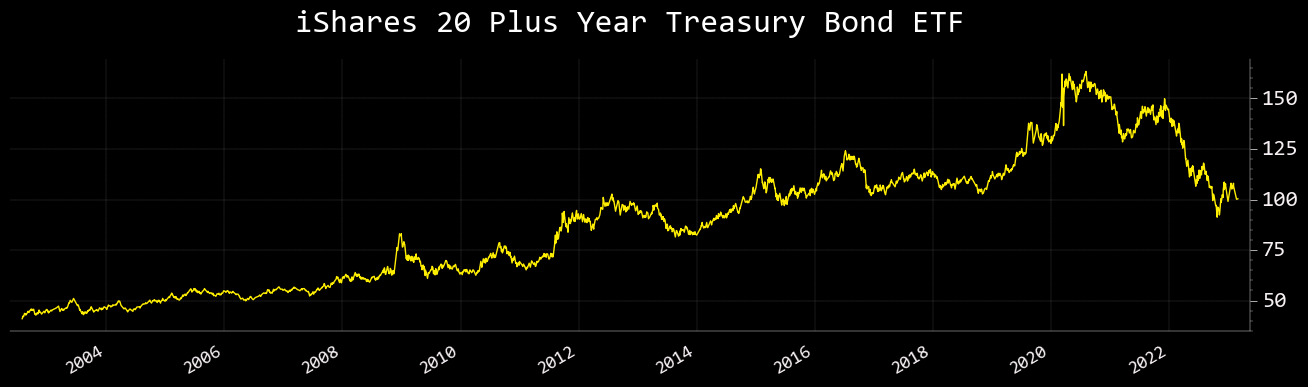

In [33]:
# Visualize the data, if desired.

data['Adj Close'].plot(figsize = [16, 4], title = 'iShares 20 Plus Year Treasury Bond ETF', xlabel = '');

In [34]:
# Create a Pandas DataFrame and then assign columns to each model.

results = pd.DataFrame()

results['Standard Deviation'] = openbb.ta.rvol_std(data, window = 2)
results['Parkinson'] = openbb.ta.rvol_parkinson(data, window = 2)
results['Hodges-Tompkins'] = openbb.ta.rvol_hodges_tompkins(data, window = 2)
results['Garman-Klass'] = openbb.ta.rvol_garman_klass(data, window = 2)
results['Rogers-Satchell'] = openbb.ta.rvol_rogers_satchell(data, window = 2)
results['Yang-Zhang'] = openbb.ta.rvol_yang_zhang(data, window = 2)

results

,Standard Deviation,Parkinson,Hodges-Tompkins,Garman-Klass,Rogers-Satchell,Yang-Zhang
date,,,,,,
2002-08-01,0.074482,0.083403,0.074511,0.075624,0.070795,0.140883
2002-08-02,0.050616,0.105981,0.050636,0.103655,0.096629,0.144341
2002-08-05,0.064933,0.109263,0.064958,0.114035,0.109442,0.163509
2002-08-06,0.145795,0.072415,0.145851,0.078072,0.079528,0.138408
2002-08-07,0.123230,0.083376,0.123277,0.092822,0.096105,0.152722
...,...,...,...,...,...,...
2023-02-23,0.006758,0.088884,0.006761,0.088082,0.088393,0.167799
2023-02-24,0.256052,0.110914,0.256150,0.115316,0.111796,0.218043
2023-02-27,0.177978,0.097925,0.178047,0.110618,0.109414,0.214669


The "problem" has been solved; achieving a sense of accomplishment is important for maintaining the motivation required to keep driving forward. Breaking large workflows down to a series of smaller items will make them easier to manage, make the undertaking seem less overwhelming, and provide the satisfaction associated with completing a task or chore.

With the question answered, what is the next task? 

### How do I parametize this table so that it can be called as a one-liner function, sporting a variable ticker input?

The first step is to wrap the DataFrame above in a function, with the input parameters of the function corresponding to those belonging to the individual model one-liners.

In [35]:
from typing import Optional

def rvol(
    data: pd.DataFrame, 
    window:int = 2,
    trading_periods: Optional[int] = None,
    is_crypto: bool = False
)-> pd.DataFrame:
    
    results = pd.DataFrame()

    results['Standard Deviation'] = openbb.ta.rvol_std(data, window, trading_periods, is_crypto)
    results['Parkinson'] = openbb.ta.rvol_parkinson(data, window, trading_periods, is_crypto)
    results['Hodges-Tompkins'] = openbb.ta.rvol_hodges_tompkins(data, window, trading_periods, is_crypto)
    results['Garman-Klass'] = openbb.ta.rvol_garman_klass(data, window, trading_periods, is_crypto)
    results['Rogers-Satchell'] = openbb.ta.rvol_rogers_satchell(data, window, trading_periods, is_crypto)
    results['Yang-Zhang'] = openbb.ta.rvol_yang_zhang(data, window, trading_periods, is_crypto)
    
    return results

rvol(data)

,Standard Deviation,Parkinson,Hodges-Tompkins,Garman-Klass,Rogers-Satchell,Yang-Zhang
date,,,,,,
2002-08-01,0.074482,0.083403,0.074511,0.075624,0.070795,0.140883
2002-08-02,0.050616,0.105981,0.050636,0.103655,0.096629,0.144341
2002-08-05,0.064933,0.109263,0.064958,0.114035,0.109442,0.163509
2002-08-06,0.145795,0.072415,0.145851,0.078072,0.079528,0.138408
2002-08-07,0.123230,0.083376,0.123277,0.092822,0.096105,0.152722
...,...,...,...,...,...,...
2023-02-23,0.006758,0.088884,0.006761,0.088082,0.088393,0.167799
2023-02-24,0.256052,0.110914,0.256150,0.115316,0.111796,0.218043
2023-02-27,0.177978,0.097925,0.178047,0.110618,0.109414,0.214669


Then, because the `data` argument will accept a function as an input, the `load` function can be passed through, instead of a Pandas DataFrame. First, setup the parameters as a separate block.

In [36]:
symbol = 'SPY'
window = 30
trading_periods = 252
is_crypto: bool = False

Now make the function to wrap both the `load` and `rvol` together.

In [37]:
def realized_vol(symbol) -> pd.DataFrame:
    data = openbb.stocks.load(f"{symbol}")
    
    rvol_df = rvol(data, window, trading_periods, is_crypto)
    
    return rvol_df
    
rvol_df = realized_vol(symbol)

rvol_df

Loading Daily data for SPY with starting period 2020-02-26.

,Standard Deviation,Parkinson,Hodges-Tompkins,Garman-Klass,Rogers-Satchell,Yang-Zhang
date,,,,,,
2020-04-08,0.826918,0.515688,0.861901,0.553647,0.585802,0.891325
2020-04-09,0.818946,0.510654,0.853592,0.549184,0.580775,0.886029
2020-04-13,0.819186,0.506786,0.853842,0.546098,0.579007,0.880671
2020-04-14,0.813773,0.503036,0.848200,0.544810,0.579112,0.881659
2020-04-15,0.811932,0.497237,0.846281,0.540157,0.576165,0.882089
...,...,...,...,...,...,...
2023-02-23,0.163743,0.140126,0.170670,0.139145,0.139103,0.177882
2023-02-24,0.163181,0.139783,0.170084,0.139412,0.139611,0.181844
2023-02-27,0.163138,0.138628,0.170039,0.137471,0.136858,0.181614


Thanks for reading, and if you want more actionable code snippets and notebooks, check out what else, *Getting Started with Python for Quant Finance*, has to [offer!](​https://gettingstartedwithpythonforquantfinance.com/?ref=ezyapsobd​) 